In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy.stats import shapiro
from patsy import dmatrices
from IPython.display import display
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [26]:
## Importando a base
base = pd.read_excel('4 - Regressão linear - Dados.xlsx')
base.head()

,Vendas,Experiencia,Treinamento,Sexo,Simpatia,Graduação
0,92,20,0,0,1,0
1,96,20,10,0,1,0
2,98,25,0,0,1,0
3,101,25,10,0,1,0
4,112,35,10,0,2,0


In [27]:
##Codificar as variáveis qualitativas
base.replace({'Sexo':{0:'Feminino',1:'Masculino'}} , inplace=True)
base.replace({'Simpatia':{1:'Baixa',2:'Média',3:'Alta'}} , inplace=True)
base.replace({'Graduação':{0:'Não',1:'Sim'}} , inplace=True)
base['d_Alta'] = np.where(base['Simpatia'] == 'Alta', 1, 0)
base['d_Media'] = np.where(base['Simpatia'] == 'Média', 1, 0)
base['d_Baixa'] = np.where(base['Simpatia'] == 'Baixa', 1, 0)
base['d_Masc'] = np.where(base['Sexo'] == 'Masculino', 1, 0)
base['d_Grad'] = np.where(base['Graduação'] == 'Sim', 1, 0)
base.sample(10)

,Vendas,Experiencia,Treinamento,Sexo,Simpatia,Graduação,d_Alta,d_Media,d_Baixa,d_Masc,d_Grad
4,112,35,10,Feminino,Média,Não,0,1,0,0,0
5,118,35,30,Masculino,Média,Não,0,1,0,1,0
1,96,20,10,Feminino,Baixa,Não,0,0,1,0,0
18,112,40,10,Feminino,Alta,Sim,1,0,0,0,1
14,104,25,10,Masculino,Média,Sim,0,1,0,1,1
2,98,25,0,Feminino,Baixa,Não,0,0,1,0,0
0,92,20,0,Feminino,Baixa,Não,0,0,1,0,0
16,108,35,10,Masculino,Média,Sim,0,1,0,1,1
11,100,30,20,Feminino,Baixa,Sim,0,0,1,0,1
13,106,20,20,Masculino,Média,Sim,0,1,0,1,1


## Regressão linear simples (uma variável independente quantitativa)

<Axes: xlabel='Experiencia', ylabel='Vendas'>

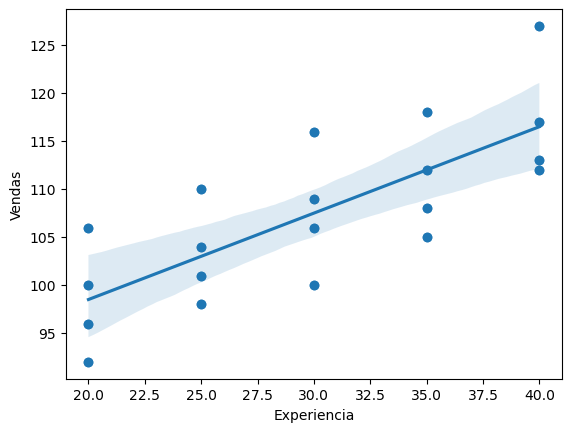

In [28]:
## Scatter Plot com linha de regressão
plt.scatter(x='Experiencia', y='Vendas', data=base)
sns.regplot(x='Experiencia',y='Vendas',data=base)

In [74]:
####Teste de hipótese - ANOVA 
  
  
  #Regressão linear simples (variável independente quantitativa) 
  
    #Definir as hipóteses - ANOVA (Teste F) => Ho: B1=0 (População) ; Ha: Pelo menos 1 B!=0
    #Definir as hipóteses - Teste t => #Ho: B1=0 (População) ; Ha: B1!=0
                                      
  #Estimar o modelo de regressão

## Modelos
modelo1 = ols('Vendas ~ Experiencia', data=base).fit()
print(modelo1.summary()) ## Pode escrever qual modelo quer ver o summary

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     25.90
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           7.66e-05
Time:                        10:57:29   Log-Likelihood:                -61.754
No. Observations:                  20   AIC:                             127.5
Df Residuals:                      18   BIC:                             129.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      80.5000      5.451     14.768      

In [30]:
#Output ANOVA - R-Squared = sum_sq Experiencia / sum_sq Total = 810/(810+563) = 0,59 
anova_table = sm.stats.anova_lm(modelo1, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
Experiencia,1.0,810.0,810.000000,25.89698,0.000077
Residual,18.0,563.0,31.277778,NaN,NaN


## Regressão linear múltipla (duas variáveis independentes quantitativas)

In [76]:
####Teste de hipótese - ANOVA 
  
  
  #Regressão linear múltipla (duas variáveis independentes quantitativas) 
  
    #Definir as hipóteses - ANOVA (Teste F) => Ho: B1=B2=0 (População) ; Ha: Pelo menos 1 B!=0
    #Definir as hipóteses - Teste t => #Ho: B1=0 (População) ; Ha: B1!=0
                                       #Ho: B2=0 (População) ; Ha: B2!=0
                                      
  #Estimar o modelo de regressão

## Modelos
modelo2 = ols('Vendas ~ Experiencia+Treinamento', data=base).fit()

In [18]:
#Output do modelo de regressão linear
print(modelo2.summary()) ## Pode escrever qual modelo quer ver o summary

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     41.38
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           2.94e-07
Time:                        10:31:33   Log-Likelihood:                -52.973
No. Observations:                  20   AIC:                             111.9
Df Residuals:                      17   BIC:                             114.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      81.1808      3.619     22.434      

## Regressão com variáveis dummy (uma variável independente qualitativa)

In [77]:
base.columns

Index(['Vendas', 'Experiencia', 'Treinamento', 'Sexo', 'Simpatia', 'Graduação',
       'd_Alta', 'd_Media', 'd_Baixa', 'd_Masc', 'd_Grad'],
      dtype='object')

In [41]:
#Evidências amostrais

#Tabela descritiva
tabela=(round(base.groupby('d_Grad').describe()['Vendas'], 2))
print(tabela)

        count   mean    std    min     25%    50%     75%    max
d_Grad                                                          
0        10.0  107.6  11.11   92.0   98.75  107.5  115.75  127.0
1        10.0  107.4   5.40  100.0  104.25  107.0  111.50  116.0


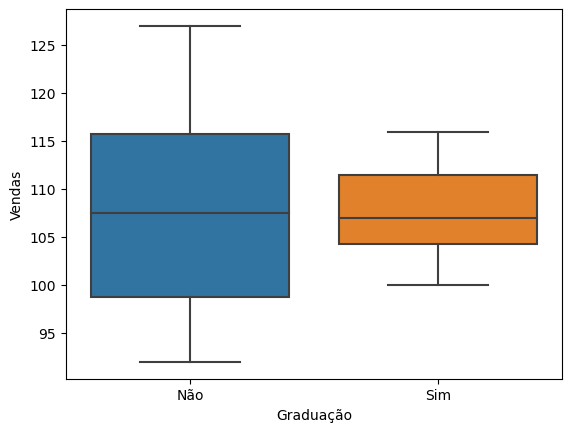

In [42]:
#Evidências amostrais

##Boxplot
ax = sns.boxplot(y='Vendas', x='Graduação', data=base, orient='v')


In [78]:
####Teste de hipótese - ANOVA 
  
  
  #Regressão com dummies (variável independente qualitativa) 
  
    #Definir as hipóteses - ANOVA (Teste F) => Ho: B1=B2=0 (População) ; Ha: Pelo menos 1 B!=0
    #Definir as hipóteses - Teste t => #Ho: B1=0 (População) ; Ha: B1!=0
                                       #Ho: B2=0 (População) ; Ha: B2!=0
                                      
  #Estimar o modelo de regressão

## Modelos
modelo3 = ols('Vendas ~ d_Grad', data=base).fit()

In [44]:
#Output do modelo de regressão
print(modelo3.summary()) ## Pode escrever qual modelo quer ver o summary

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.002622
Date:                Sat, 25 Oct 2025   Prob (F-statistic):              0.960
Time:                        10:37:23   Log-Likelihood:                -70.668
No. Observations:                  20   AIC:                             145.3
Df Residuals:                      18   BIC:                             147.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.6000      2.762     38.962      0.0

## Regressão linear múltipla (uma variável independente quali + quanti)

In [79]:
####Teste de hipótese - ANOVA 
  
  
  #Regressão linear múltipla (variável independente quantitativa + qualitativa) 
  
    #Definir as hipóteses - ANOVA (Teste F) => Ho: B1=B2=B3=0 (População) ; Ha: Pelo menos 1 B!=0
    #Definir as hipóteses - Teste t => #Ho: B1=0 (População) ; Ha: B1!=0
                                       #Ho: B2=0 (População) ; Ha: B2!=0
                                       #Ho: B3=0 (População) ; Ha: B3!=0

  #Estimar o modelo de regressão

## Modelos
modelo4 = ols('Vendas ~ Experiencia+d_Alta+d_Media', data=base).fit()

In [48]:
#Output do modelo de regressão linear
print(modelo4.summary()) ## Pode escrever qual modelo quer ver o summary

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     15.10
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           6.30e-05
Time:                        10:38:13   Log-Likelihood:                -57.236
No. Observations:                  20   AIC:                             122.5
Df Residuals:                      16   BIC:                             126.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      86.6509      5.281     16.408      

## Regressão linear múltipla (todas as variáveis do banco de dados)

In [52]:
base.columns

Index(['Vendas', 'Experiencia', 'Treinamento', 'Sexo', 'Simpatia', 'Graduação',
       'd_Alta', 'd_Media', 'd_Baixa', 'd_Masc', 'd_Grad'],
      dtype='object')

In [80]:
####Teste de hipótese - ANOVA 
  
  
  #Regressão linear múltipla
  
    #Definir as hipóteses - ANOVA (Teste F) => Ho: B1=B2=B3=B4=B5=B6=0 (População) ; Ha: Pelo menos 1 B!=0
    #Definir as hipóteses - Teste t => #Ho: B1=0 (População) ; Ha: B1!=0
                                       #Ho: B2=0 (População) ; Ha: B2!=0
                                       #Ho: B3=0 (População) ; Ha: B3!=0
                                       #Ho: B4=0 (População) ; Ha: B4!=0
                                       #Ho: B5=0 (População) ; Ha: B5!=0
                                       #Ho: B6=0 (População) ; Ha: B6!=0

  #Estimar o modelo de regressão

## Modelos
modelo5 = ols('Vendas ~ Experiencia+Treinamento+d_Alta+d_Media+d_Masc+d_Grad', data=base).fit()

In [91]:
#Output do modelo de regressão linear
print(modelo5.summary()) ## Pode escrever qual modelo quer ver o summary

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     23.32
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           3.01e-06
Time:                        11:06:51   Log-Likelihood:                -46.018
No. Observations:                  20   AIC:                             106.0
Df Residuals:                      13   BIC:                             113.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      86.6403      3.728     23.241      

In [109]:
# Resultados das regressões hierárquicas para Vendas

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from IPython.display import HTML, display
import pandas as pd

# Modelos
modelo1 = ols('Vendas ~ Experiencia', data=base).fit()
modelo2 = ols('Vendas ~ Experiencia + Treinamento', data=base).fit()
modelo3 = ols('Vendas ~ d_Grad', data=base).fit()
modelo4 = ols('Vendas ~ Experiencia+d_Alta+d_Media', data=base).fit()
modelo5 = ols('Vendas ~ Experiencia+Treinamento+d_Alta+d_Media+d_Masc+d_Grad', data=base).fit()

# Gera a tabela
tabela = summary_col(
    [modelo1, modelo2, modelo3, modelo4, modelo5], # Altere os modelos
    stars=True,
    model_names=['(1)', '(2)', '(3)', '(4)', '(5)'], # Altere os nomes dos modelos
    info_dict={
        'N': lambda x: f"{int(x.nobs)}",
        'R²': lambda x: f"{x.rsquared:.3f}",
        'R² ajust.': lambda x: f"{x.rsquared_adj:.3f}",
        'F': lambda x: f"{x.fvalue:.2f} (p={x.f_pvalue:.3f})"
    }
)

# Junta tudo (coeficientes + rodapé)
df = pd.concat(tabela.tables)

# 🔧 remove duplicatas do índice antes de ordenar
df = df[~df.index.duplicated(keep='first')]

# Define ordem desejada dos coeficientes estimados no modelo
ordem = ['Intercept', 'Experiencia', 'Treinamento', 'd_Grad', 'd_Alta', 'd_Media', 'd_Masc', 'R²', 'R² ajust.', 'F', 'N']

# Reordena só o que existe
df = df.reindex([i for i in ordem if i in df.index])

# Mostra em HTML
display(HTML(df.to_html(border=0)))

,(1),(2),(3),(4),(5)
Intercept,80.5000***,81.1808***,107.6000***,86.6509***,86.6403***
Experiencia,0.9000***,0.6504***,,0.4792**,0.3672**
Treinamento,,0.4538***,,,0.3896***
d_Grad,,,-0.2000,,-1.8635
d_Alta,,,,10.5189**,7.8612**
d_Media,,,,7.9717**,5.7041*
d_Masc,,,,,0.4091
R²,0.590,0.830,0.000,0.739,0.915
R² ajust.,0.567,0.810,-0.055,0.690,0.876
F,25.90 (p=0.000),41.38 (p=0.000),0.00 (p=0.960),15.10 (p=0.000),23.32 (p=0.000)


# Premisass do modelo de regressão

As premissas precisam ser atendidas para que os resultados do teste sejam considerados válidos.

### Independência do erros
Este pressuposto é testado quando o estudo é planejado. Isso significa que todos os grupos são mutuamente exclusivos, ou seja, um indivíduo só pode pertencer a um grupo. Além disso, isso significa que os dados não são medidas repetidas (não coletadas ao longo do tempo). 

### Normalidade dos erros

O pressuposto de normalidade é testado nos resíduos (amostra) do modelo quando provenientes de uma ANOVA ou regressão. Um método para testar o pressuposto de normalidade é o teste de Shapiro-Wilk. Infelizmente, a saída não está rotulada, mas é a estatística de teste W e valor-p, respectivamente.

In [55]:
# Teste de normalidade de Shapiro-Wilk

#H0: Os erros (população) seguem uma distribuição normal 
#Estatística do teste W e valor-p, respectivamente

print(shapiro(modelo5.resid))

ShapiroResult(statistic=0.947128176689148, pvalue=0.32559072971343994)


(array([1., 0., 2., 0., 2., 2., 6., 3., 3., 1.]),
 array([-6.12440656, -5.1136156 , -4.10282464, -3.09203368, -2.08124272,
        -1.07045176, -0.0596608 ,  0.95113015,  1.96192111,  2.97271207,
         3.98350303]),
 <BarContainer object of 10 artists>)

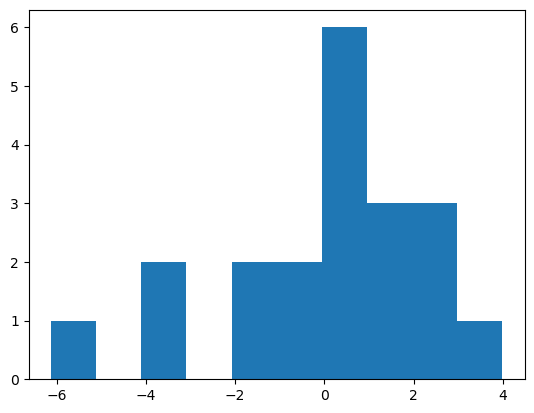

In [56]:
plt.hist(modelo5.resid)

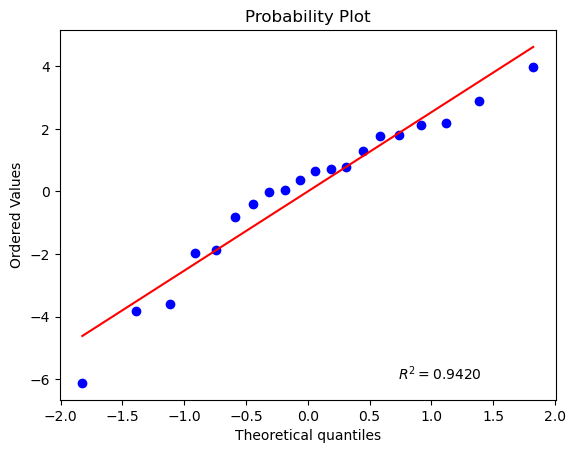

In [57]:
normality_plot, stat = stats.probplot(modelo5.resid, plot= plt, rvalue= True)

### Homoscedasticidade
O último pressuposto é variância dos erros é homoscesdástica em função da variável independente

Text(0, 0.5, 'Resíduos padronizados')

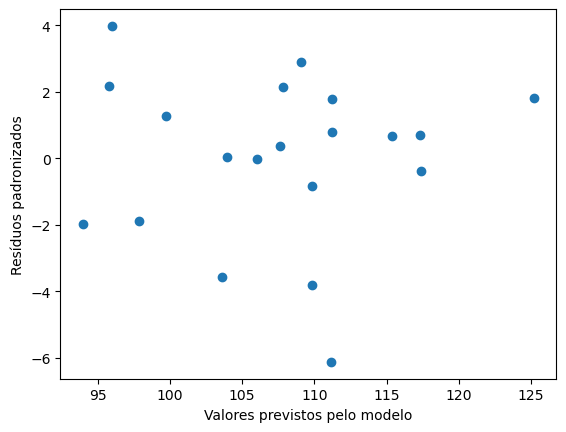

In [58]:
## Plotar os residuos em função das variaveis dependentes

## Scatter Plot com linha de regressão
plt.scatter(modelo5.fittedvalues, modelo5.resid)
plt.xlabel('Valores previstos pelo modelo')
plt.ylabel('Resíduos padronizados')

In [59]:
## Teste de Breusch-Pagan 
#H0: A variância dos erros (população) é constante (homoscedasticidade)

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']
 
# Get the test result
test_result = het_breuschpagan(modelo5.resid, modelo5.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 4.075283782504129),
 ('p-value', 0.666489055858229)]